### Ejercicio 1

* Se analiza el caso de la coparticipación federal de impuestos de la provincia de Tucumán.
* los datos abarcan el periodo desde 2014 a agosto de 2024
* La variable bajo a análisis es copa_bruta 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format


In [17]:
df = pd.read_excel("copa.xlsx")


In [18]:
df = df[["date","copa_bruta"]]
df["date"] = pd.to_datetime(df["date"], format="%d/%m/%Y")
df = df[df["copa_bruta"]!=0]
df.head(2)

,date,copa_bruta
0,2018-01-02,"77,107.59"
1,2018-01-03,"180,426.86"


<Axes: title={'center': 'Coparticipacion Federal Tucumán Bruta'}>

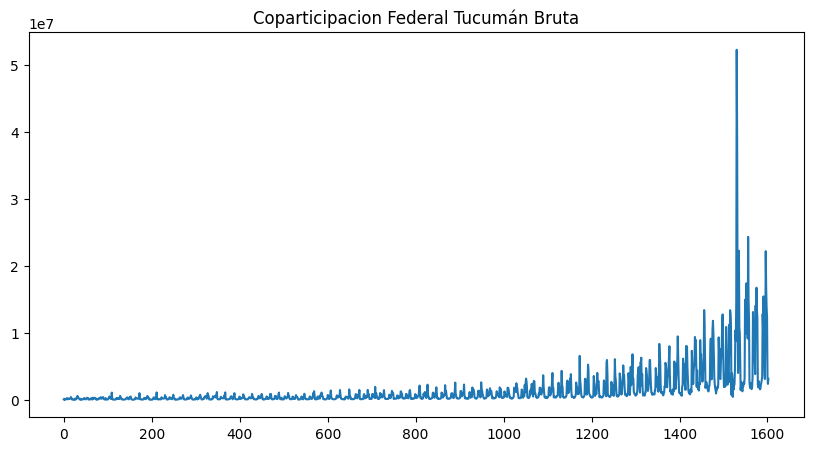

In [19]:
df["copa_bruta"].plot(title="Coparticipacion Federal Tucumán Bruta", figsize=(10,5))

Se ve claramente el efecto de la inflación, se deberá tratar este punto

In [20]:
df.describe()

,date,copa_bruta
count,1602,"1,602.00"
mean,2021-05-10 18:22:01.348314880,"1,433,495.86"
min,2018-01-02 00:00:00,"19,422.27"
25%,2019-09-13 18:00:00,"189,332.99"
50%,2021-05-15 12:00:00,"449,663.54"
75%,2023-01-05 18:00:00,"1,313,056.39"
max,2024-08-30 00:00:00,"52,216,025.70"
std,NaN,"2,997,190.73"


In [21]:
df.dtypes

date          datetime64[ns]
copa_bruta           float64
dtype: object

In [22]:
df.isna().sum()

date          0
copa_bruta    0
dtype: int64

In [23]:
# cantidad de fechas por ejercicio
df.groupby(df["date"].dt.year).count()

,date,copa_bruta
date,,
2018,232,232
2019,240,240
2020,240,240
2021,242,242
2022,243,243
2023,242,242
2024,163,163


Text(0.5, 1.0, 'Histograma de Coparticipacion Federal Tucumán Bruta')

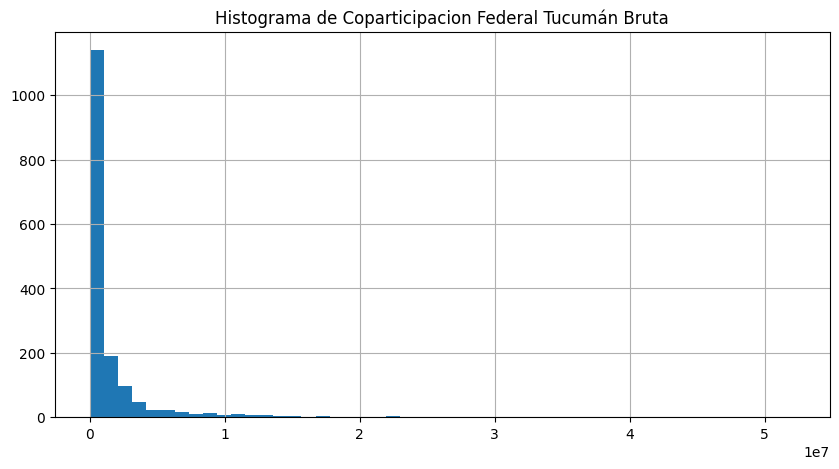

In [24]:
df["copa_bruta"].hist(bins=50, figsize=(10,5))
plt.title("Histograma de Coparticipacion Federal Tucumán Bruta")

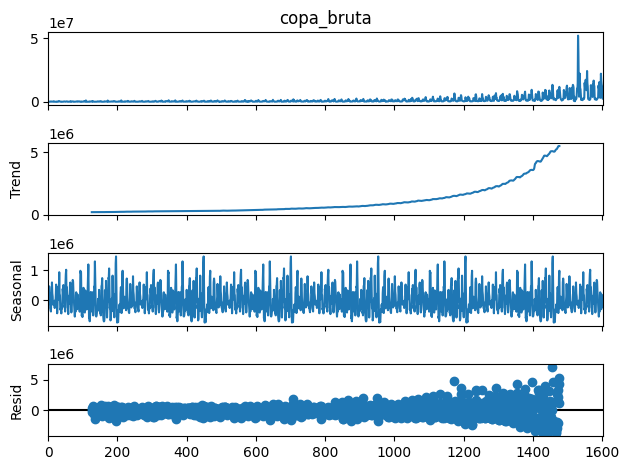

In [25]:
# Realizar la descomposición estacional aditiva
result = seasonal_decompose(df['copa_bruta'], model='additive', period=252)
result.plot()
plt.show()

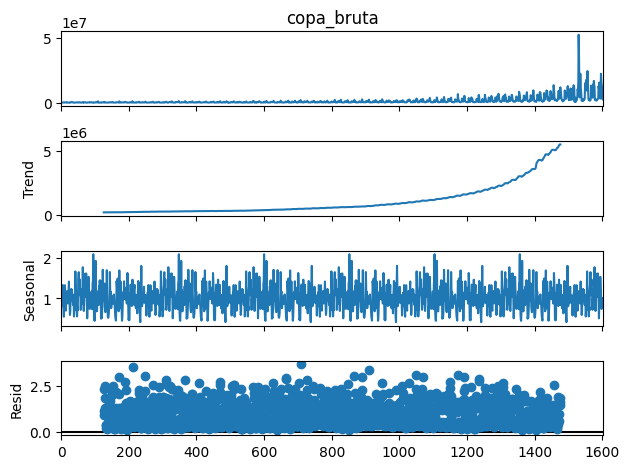

In [26]:
# Realizar la descomposición estacional multiplicativa
result = seasonal_decompose(df['copa_bruta'], model='multiplicative', period=252)
result.plot()
plt.show()

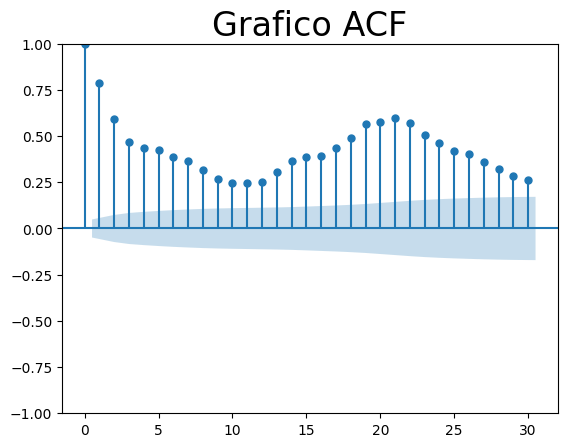

In [27]:
plot_acf(df.copa_bruta,lags=30)
plt.title("Grafico  ACF", size= 24)
plt.show()

In [28]:
primera_diffs=df.copa_bruta.values[1:]-df.copa_bruta.values[:-1]
primera_diffs=np.concatenate([primera_diffs,[0]])
df['copa_bruta_diff1']=primera_diffs
df.head(2)

,date,copa_bruta,copa_bruta_diff1
0,2018-01-02,"77,107.59","103,319.28"
1,2018-01-03,"180,426.86","-155,733.13"


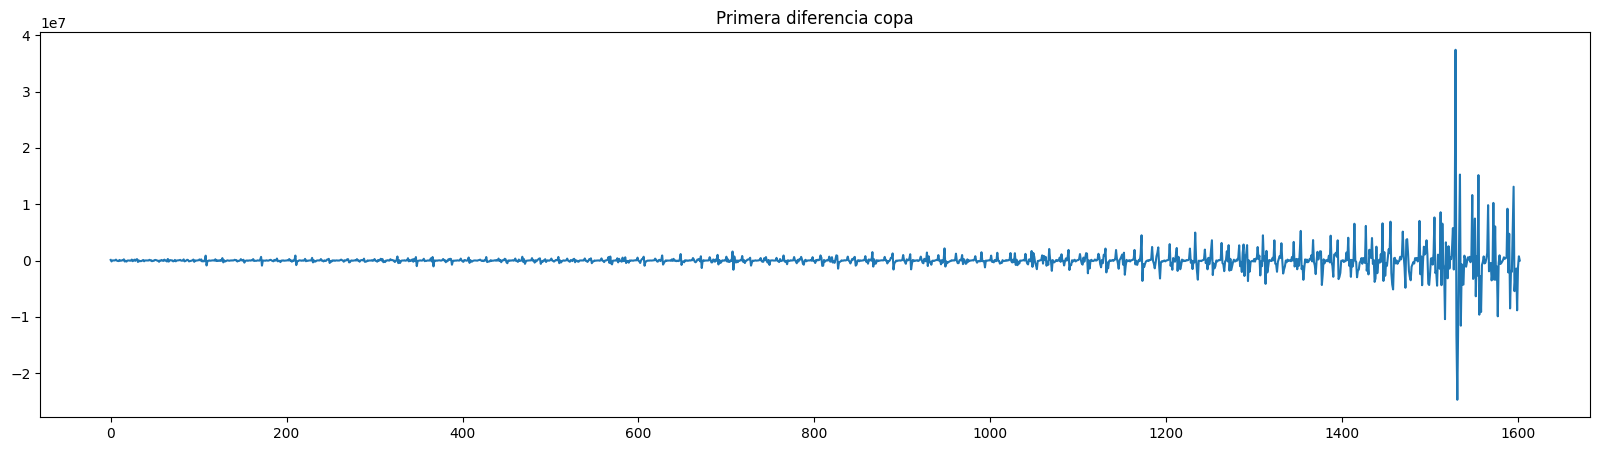

In [29]:
df.copa_bruta_diff1.plot(figsize=(20,5), title = "Primera diferencia copa")
plt.show()

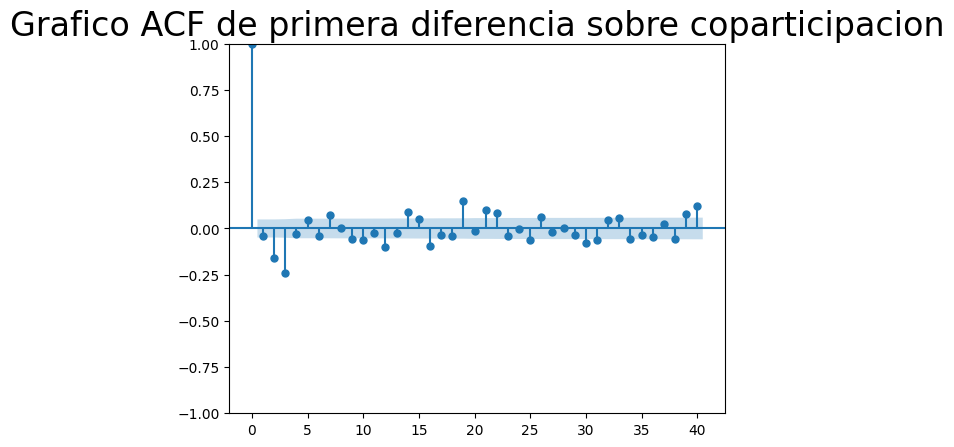

In [30]:
plot_acf(df.copa_bruta_diff1,lags=40)
plt.title("Grafico ACF de primera diferencia sobre coparticipacion", size= 24)
plt.show()